# excels2vensim

## What it does
1. Reads excel files with any structure
2. Assigns cellrange names in the inputs file (unique per sheet and file)
3. Generates the Vensim code to paste in the model file

### Advantages
* It does not require any changes in the structure of the Excel files
* It can work with data spread across different tabs and/or files
* No limit on the number of dimensions (VDF only reads up to 8)
* Easy to change the order of the dimensions in the Vensim file in any time
* Compatible with Python translation
* Compatible with version control
* Deals with several variables at a time
* Adds * at the end of Constant's cellrange name when transposition is needed
* Reusable

### Disadvantages
* Requires Python
* Requires manual mapping (as VDFs does)


## Notes
This version is only a proposal. If accepted, several improvements may be done to make it more robust and easy to use:
* A simple GUI can be developed to make the usage simpler. This would prevent the user from having to create the json files shown in the examples.
* Some errors and warnings could be raised when trying to write a cellrange name more than once.
* Support for DATA and LOOKUPS should be added.
* Currently the subscript range values are hardcoded, this must be changed in the future using the Vensim parser to automatically detect the model subscripts.

## Example 1: Reading simple vectors


Imagine we have the **source** subscript defined in Vensim model with values of Gas, Oil, and Coal, i.e.:

```console
source:
    Gas, Oil, Coal 
    ~
    ~ 
    |
```
<br>

For Vensim to read the data correctly, parameters with the **source** dimension can be defined in the following two ways in Excel:


1. Column vector (*B18:B20*): the **source** dimension is spread along the **row**s with step **1**, i.e., each row has a new value of **source** dimension.

2. Row vector (*A24:C24*): the **source** dimension is spread along the **col**s with step **1**, i.e., each column has a new value of **source** dimension.

<br><br>
The data is located in `Region1` tab in the `inputs_constants.xlsx` file:
<br><br><br>

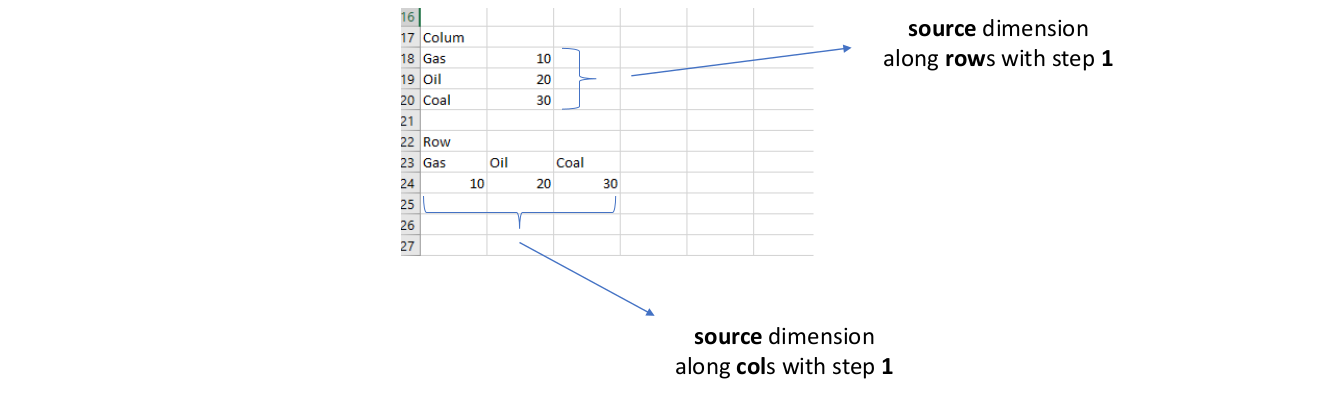

In [1]:
from IPython.display import display, Image
display(Image(filename='figures/excel1.png'))

To read the data for parameter **q_col** (from *A24:C24*) and **q_row** (from *B18:B20*) we create a file with the  following information (this would not be required if the GUI is built).
<br><br><br>
```python
{
'q_row': {
    'type': 'Constants',
    'dims': ['source'],                      # dimensions names list
    'cell': 'A24',                           # reference cell, first cell with data values
    'file': 'data/input_constants.xlsx',      # file name
    'sheet': 'Region1',                      # sheet name
    'description': 'This is my variable q_row.',   # description
    'units': 'TWh',                          # units
    'dimensions':{                           # read along information
        'source': ['col', 1]                 # dimension name: [read_along, step]
        }
    },
'q_col': {
    'type': 'Constants',
    'dims': ['source'],                      # dimensions names list
    'cell': 'B18',                           # reference cell, first cell with data values
    'file': 'data/inputs_constants.xlsx',      # file name
    'sheet': 'Region1',                      # sheet name
    'description': 'This is my variable q_col.',   # description
    'units': 'TWh',                          # units
    'dimensions':{                           # read along information
        'source': ['row', 1]                 # dimension name: [read_along, step]
        }
    }
}
```

<br><br>
The information shown above is already stored in the `example1.json` file. 
<br><br>


### There are two ways to execute the code

From a custom Python script, the whole procedure may be executed with the following command:

```python
from excels2vensim import load_from_json, Subscripts
Subscripts.read('example_constants.mdl')
load_from_json('data/example1.json')
```

To run it from the command line:
```
python -m excels2vensim example_constants.mdl data/example1.json
```

It is also possible to run several _json_ files at once by appending them at the end. It is also possible to
save the vensimequations in a file using _--output-file_ argument, e.g.:
```
python -m excels2vensim --out-file=my_equations.txt example_constants.mdl data/example1.json
```

for more information check the help:
```
python -m excels2vensim --help
```

### Outputs
The execution of either of the previous codes will:

1. Generate the Vensim code to copy in the *text mode* of the Vensim model (*.mdl*)

2. Write the cell range name in the Excel file.
<br><br><br>


In [2]:
from excels2vensim import load_from_json, Subscripts
Subscripts.read('example_constants.mdl')
my_eqs = load_from_json('data/example1.json')
print(my_eqs)


q_row[source]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'q_row')
	~	TWh
	~	This is my variable q_row.
	|


<br><br><br>

## Example 2: Reading 3-dimensional matrices

Imagine we have the follwing substripts in the Vensim model:
<br><br>

```console
out:
        Elec, Heat, Solid, Liquid
        ~
        ~               |

sector:
        A, B, C, D
        ~
        ~               |

source:
        Gas, Oil, Coal
        ~
        ~               |

```
<br><br>

And the data for parameter `share_energy_region1[sector, source, out]` is located in the `Region1` tab in the `inputs_constants.xlsx` Excel file.
<br><br><br>

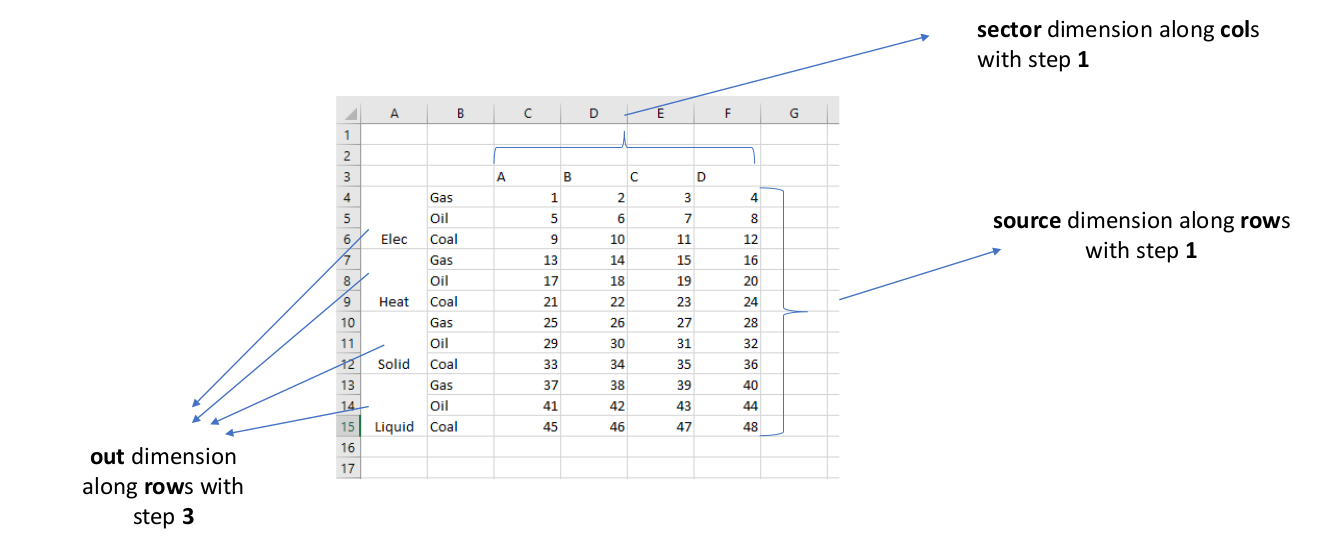

In [3]:
display(Image(filename='figures/excel2.png'))

Now:

1. the **sector** dimension is along **col**s with step **1**, as each column the value of **sector** changes;
2. the **source** dimension is along **row**s with step **1**, as each row the value of *source* changes; 
3. the **out** dimension is along **row**s with step **3**, as each 3 rows the value of **out** changes.

<br>

In this case, this variable would be described in the follwoing way (see `example2.json`)

```python
{
'share_energy_region1': {
    'type': 'Constants',
    'dims': ['sector', 'source', 'out'],
    'cell': 'C4',
    'file': 'data/inputs_constants.xlsx',
    'sheet': 'Region1',
    'description': 'This is my second variable.',
    'units': 'dmnl',
    'dimensions':{
        'sector': ['col', 1],
        'source': ['row', 1],
        'out': ['row', 3]
        }
    }
}
```

### Generated Vensim code for a 3-dimensional matrix

In [4]:
my_eqs2 = load_from_json('data/example2.json')
print(my_eqs2)


share_energy_region1[sector, source, Elec]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'share_energy_region1_1*') ~~|
share_energy_region1[sector, source, Heat]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'share_energy_region1_2*') ~~|
share_energy_region1[sector, source, Solid]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'share_energy_region1_3*') ~~|
share_energy_region1[sector, source, Liquid]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'share_energy_region1_4*')
	~	dmnl
	~	This is my second variable.
	|


<br>

## Example 3: Reading 4-dimensional matrix along different sheets (Excel tabs)

Imagine we have these subscripts in the Vensim model:
<br>


```console
out:
        Elec, Heat, Solid, Liquid
        ~
        ~               |

sector:
        A, B, C, D
        ~
        ~               |

source:
        Gas, Oil, Coal
        ~
        ~               |

region:
	Region1, Region2, Region3, Region4
	~	
	~		|

```
<br><br>

and the data for parameter `share_energy[source, sector, region, out]` in tabs `Region1`, `Region2`, `Region3`, and `Region4` in the `inputs_constants.xlsx` file.

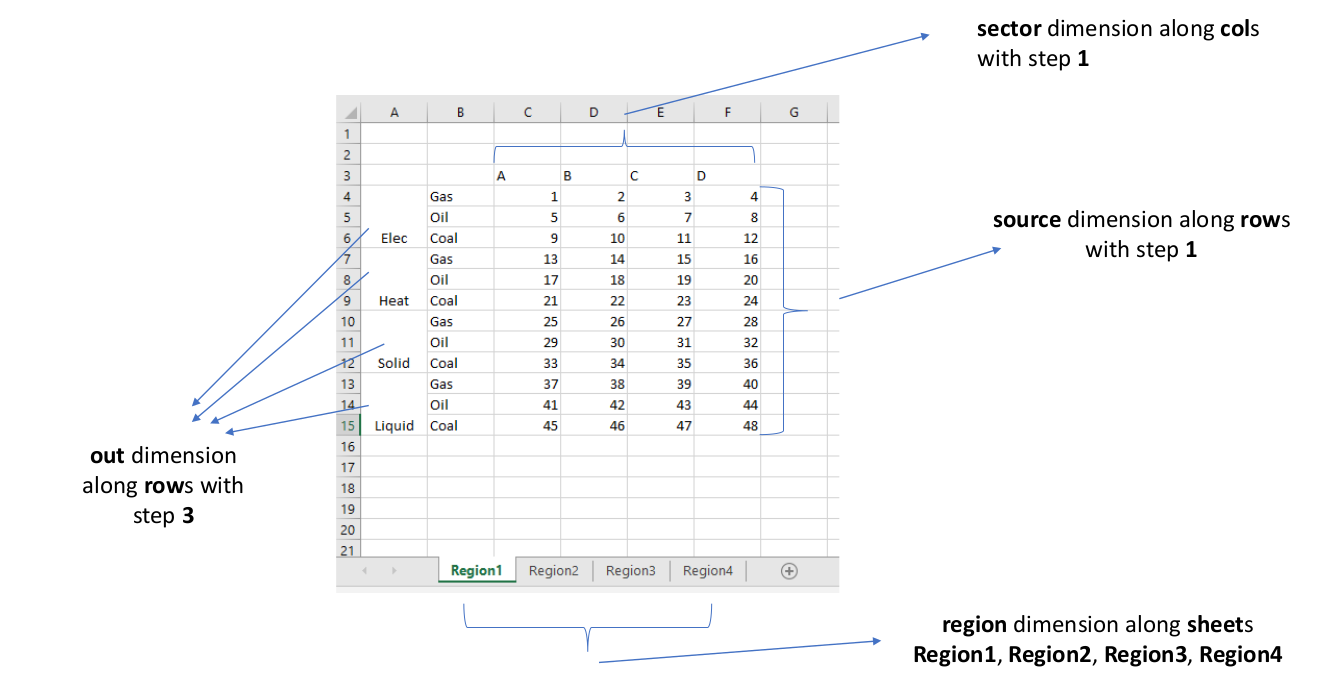

In [5]:
display(Image(filename='figures/excel3.png'))

Now the **sector**,  **source**, and **out** dimensions are defined as in Example 2. The **regions** dimension is defined along **sheet**s for sheets **Region1**, **Region2**, **Region3**, **Region4**.

We can create Vensim equations and save the cellrange names with the file *example3.json* which has the folowing information
```python
{
'share_energy': {
    'type': 'Constants',
    'dims': ['source', 'sector', 'region', 'out'],
    'cell': 'C4',
    'file': 'data/inputs_constants.xlsx',
    'description': 'This is my variable.',
    'units': 'dmnl',
    'dimensions':{
        'sector': ['col', 1],
        'region': ['sheet', ['Region1', 'Region2', 'Region3', 'Region4']],
        'source': ['row', 1],
        'out': ['row', 3]
        }
    }
}
```

In [6]:
my_eqs2 = load_from_json('data/example3.json')
print(my_eqs3)


share_energy[source, sector, Region1, Elec]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'share_energy_1') ~~|
share_energy[source, sector, Region1, Heat]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'share_energy_2') ~~|
share_energy[source, sector, Region1, Solid]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'share_energy_3') ~~|
share_energy[source, sector, Region1, Liquid]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region1', 'share_energy_4') ~~|
share_energy[source, sector, Region2, Elec]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region2', 'share_energy_1') ~~|
share_energy[source, sector, Region2, Heat]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region2', 'share_energy_2') ~~|
share_energy[source, sector, Region2, Solid]=
	GET_DIRECT_CONSTANTS('data/inputs_constants.xlsx', 'Region2', 'share_energy_3') ~~|
share_energy[source, sector, Region2, Liquid]=
	GET_DIRECT_CONSTANTS('data/inputs_con